In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
def cost_function(X,y,theta):
    n = len(y)
    y_pred = X.dot(theta)
    error = (y_pred-y)**2
    return (1/2*n)*np.sum(error)

def gradient_descent(X,y,theta,alpha,iterations):
    n = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred-y))
        theta -= alpha*1/n*error
        costs.append(cost_function(X,y,theta))
    return theta,costs

In [6]:
df = pd.read_csv('food_truck_data.txt')
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [8]:
df.shape


(97, 2)

In [9]:
n = df['Population'].size
X = np.append(np.ones((n,1)),df['Population'].values.reshape(n,1),axis = 1)
y = df['Profit'].values.reshape(n,1)
theta = np.zeros((2,1))

theta, cost = gradient_descent(X,y,theta,alpha = .01,iterations = 10)

In [10]:
print(theta, cost)

[[0.0086469]
 [0.8007915]] [63390.22508396187, 55810.36388700402, 55523.96463892878, 55468.205769853674, 55419.90331979097, 55372.004126796266, 55324.28470894374, 55276.73740262106, 55229.361366186306, 55182.15597572936]


In [11]:
print(f"h(x) = {round(theta[0,0],2)} + {round(theta[1,0],2)}x1")

h(x) = 0.01 + 0.8x1


In [12]:
predictions = np.dot(X, theta)

In [13]:
X[:,1:2].shape

(97, 1)

In [14]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [15]:
y.shape

(97, 1)

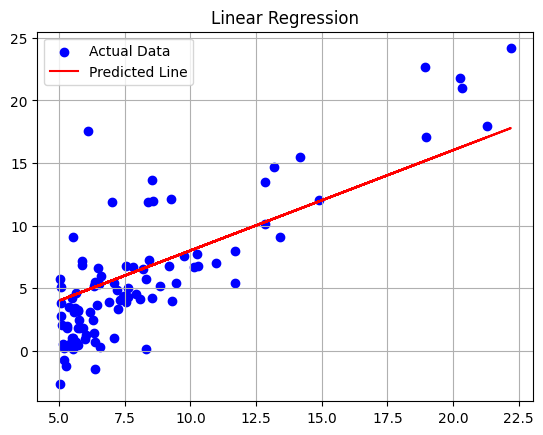

In [16]:
plt.scatter(X[:,1:2],y,color = 'blue',label = 'Actual Data')
plt.plot(X[:,1:2],predictions, color = 'Red',label = 'Predicted Line')
plt.legend()
plt.grid(True)
plt.title("Linear Regression")
plt.show()

Text(0.5, 1.0, 'Residual Plot')

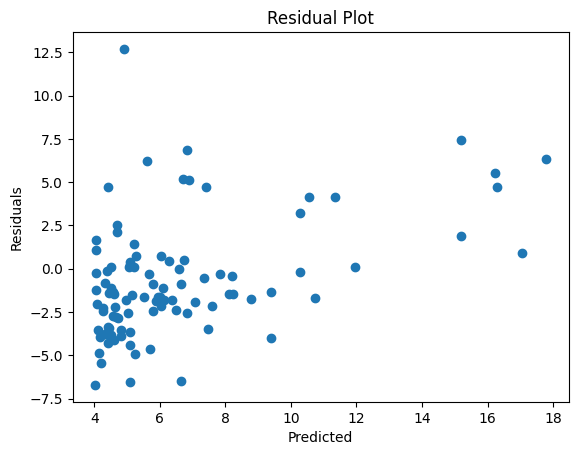

In [17]:
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [18]:
r_squared = r2_score(y, predictions)

In [19]:
r_squared


0.6096617106465911

In [20]:
mean_squared_error(y, predictions)


11.729653730625861